In [ ]:
"""Outliers."""

# Выбросы в данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# fmt: off
# isort: skip_file        
# pyupgrade: disable      
# pylint: skip-file       
# flake8: noqa           
# mypy: ignore-errors     
# codespell:disable

In [58]:
sns.set(rc = {'figure.figsize':(10,10)})

## Влияние выбросов

### Статистический тест

In [59]:
np.random.seed(42)
height = list(np.round(np.random.normal(180, 10, 1000)))
print(height)

[185.0, 179.0, 186.0, 195.0, 178.0, 178.0, 196.0, 188.0, 175.0, 185.0, 175.0, 175.0, 182.0, 161.0, 163.0, 174.0, 170.0, 183.0, 171.0, 166.0, 195.0, 178.0, 181.0, 166.0, 175.0, 181.0, 168.0, 184.0, 174.0, 177.0, 174.0, 199.0, 180.0, 169.0, 188.0, 168.0, 182.0, 160.0, 167.0, 182.0, 187.0, 182.0, 179.0, 177.0, 165.0, 173.0, 175.0, 191.0, 183.0, 162.0, 183.0, 176.0, 173.0, 186.0, 190.0, 189.0, 172.0, 177.0, 183.0, 190.0, 175.0, 178.0, 169.0, 168.0, 188.0, 194.0, 179.0, 190.0, 184.0, 174.0, 184.0, 195.0, 180.0, 196.0, 154.0, 188.0, 181.0, 177.0, 181.0, 160.0, 178.0, 184.0, 195.0, 175.0, 172.0, 175.0, 189.0, 183.0, 175.0, 185.0, 181.0, 190.0, 173.0, 177.0, 176.0, 165.0, 183.0, 183.0, 180.0, 178.0, 166.0, 176.0, 177.0, 172.0, 178.0, 184.0, 199.0, 182.0, 183.0, 179.0, 161.0, 180.0, 181.0, 205.0, 178.0, 183.0, 180.0, 168.0, 191.0, 188.0, 188.0, 171.0, 194.0, 166.0, 186.0, 202.0, 170.0, 174.0, 181.0, 175.0, 164.0, 181.0, 169.0, 185.0, 171.0, 195.0, 172.0, 177.0, 188.0, 168.0, 182.0, 193.0, 164.0

In [60]:
import scipy.stats as st
t_statistic, p_value = st.ttest_1samp(height, 182)
t_statistic, p_value

(-5.797229652505048, 9.035492171563733e-09)

In [61]:
height.append(1000)

t_statistic, p_value = st.ttest_1samp(height, 182)
t_statistic, p_value

(-1.1191390063848037, 0.26334958447468043)

### Линейная регрессия

In [62]:
anscombe = pd.read_json('../content/anscombe.json')
anscombe = anscombe[anscombe.Series == 'III']
anscombe.head()

,Series,X,Y
22,III,10,7.46
23,III,8,6.77
24,III,13,12.74
25,III,9,7.11
26,III,11,7.81


In [63]:
x, y = anscombe.X, anscombe.Y

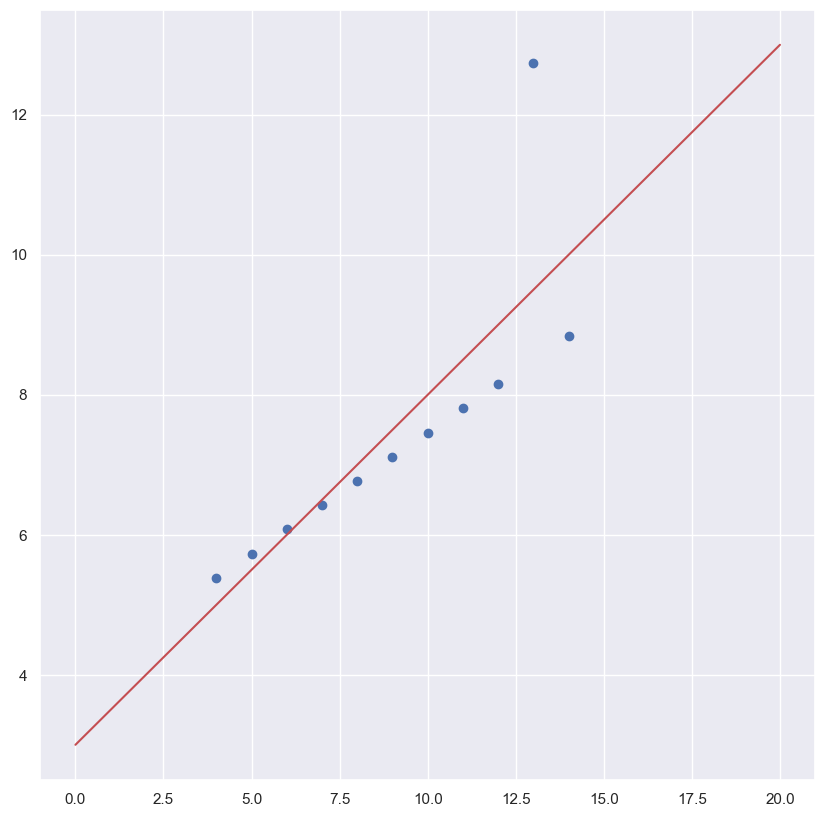

In [64]:
plt.scatter(x, y)

slope, intercept = np.polyfit(x, y, deg = 1)

x_vals = np.linspace(0, 20, num = 1000)
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, 'r')

plt.show()

In [65]:
np.corrcoef(x, y)[0][1]

0.8162867394895984

In [66]:
# будем считать выбросом наблюдение с индексом 24
x.drop(index = 24, inplace = True)
y.drop(index = 24, inplace = True)

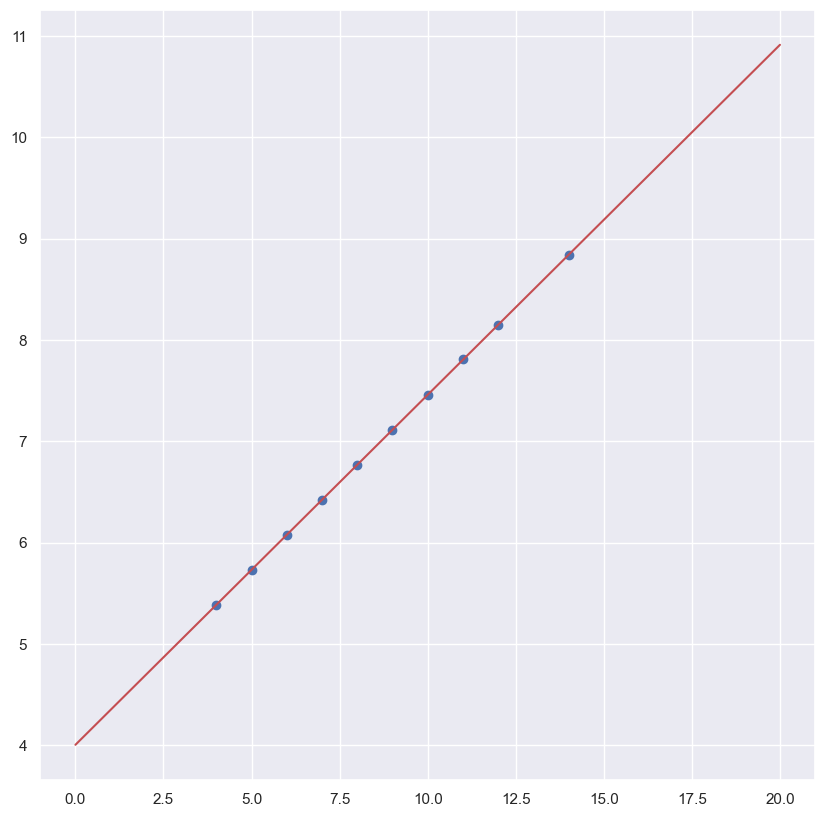

In [67]:
plt.scatter(x, y)

slope, intercept = np.polyfit(x, y, deg = 1)

x_vals = np.linspace(0, 20, num = 1000)
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, 'r')

plt.show()

In [68]:
np.corrcoef(x, y)[0][1]

0.9999965537848283

## Статистические методы

In [69]:
boston = pd.read_csv('../content/boston.csv')

### boxplot

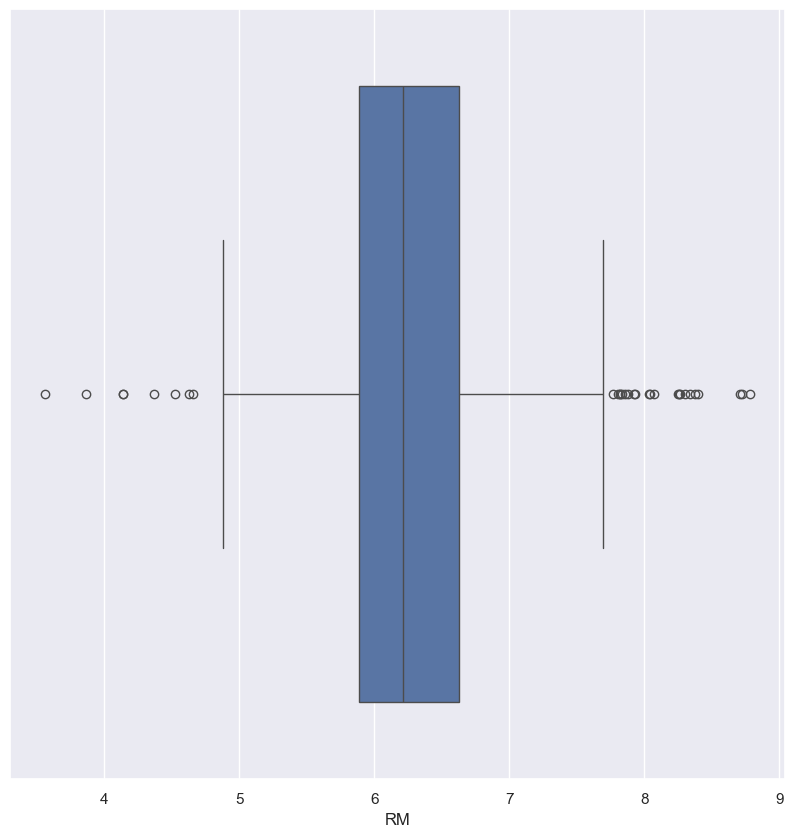

In [70]:
# усы имеют длину Q1 - 1.5 * IQR и Q3 + 1.5 * IQR
sns.boxplot(x = boston.RM);

### scatter plot

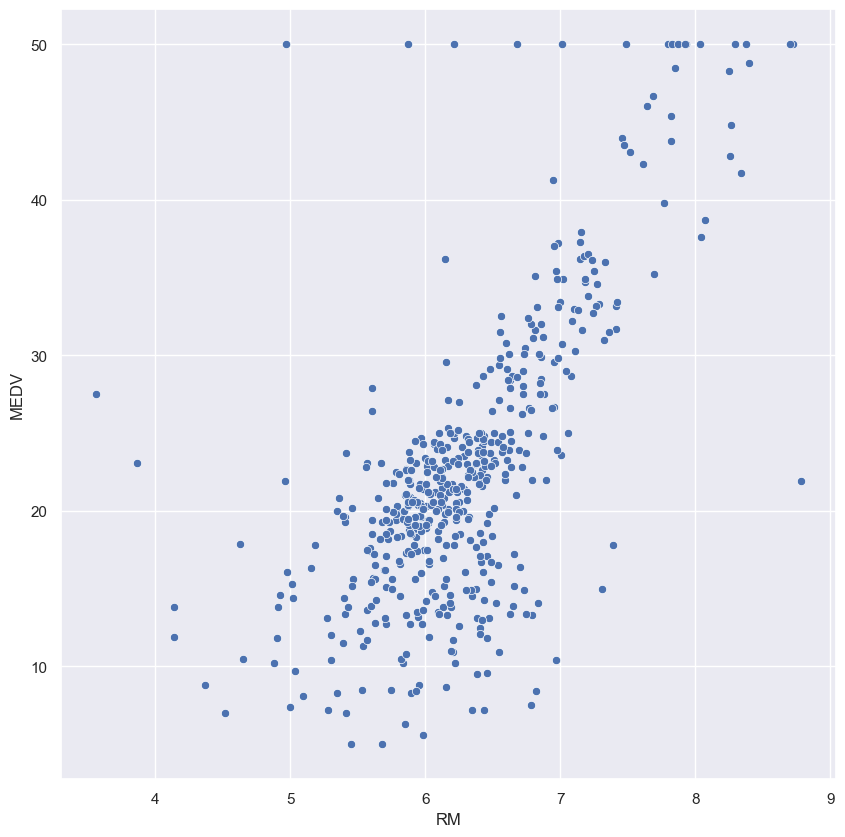

In [71]:
sns.scatterplot(x = boston.RM, y = boston.MEDV);

### z-score

In [72]:
from scipy import stats

# посмотрим на сколько СКО значение отклоняется от среднего
z = stats.zscore(boston)
z = pd.DataFrame(z, index=boston.index, columns=boston.columns)
z.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


Найдем выбросы в датафрейме

In [73]:
# найдем те значения, которые отклоняются больше, чем на три СКО
# технически, метод .any() выводит True для тех строк (axis = 1),
# где хотя бы одно значение True (т.е. > 3)
boston[(np.abs(z) > 3).any(axis = 1)].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7
57,0.01432,100.0,1.32,0.0,0.411,6.816,40.5,8.3248,5.0,256.0,15.1,392.90,3.95,31.6
102,0.22876,0.0,8.56,0.0,0.520,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63,18.6
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4


Удалим выбросы в столбце

In [74]:
# выведем True там, где в столбце RM значение меньше трех СКО
col_mask = np.where(np.abs(z.RM) < 3, True, False)

# применим маску к столбцу
boston.RM[col_mask].head()

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64

Удалим выбросы во всем датафрейме

In [75]:
# если в строке (axis = 1) есть хотя бы один False как следствие условия np.abs(z) < 3,
# метод .all() вернет логический массив, который можно использовать как фильтр
z_mask = (np.abs(z) < 3).all(axis = 1)

boston_z = boston[z_mask]
boston_z.shape

(415, 14)

In [76]:
boston[['RM', 'MEDV']].corr()

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


In [77]:
boston_z[['RM', 'MEDV']].corr()

,RM,MEDV
RM,1.000000,0.734041
MEDV,0.734041,1.000000


### Измененный z-score

In [78]:
# рассчитаем MAD
median = boston.median()
dev_median = boston - (boston.median())
abs_dev_median = np.abs(dev_median)
MAD = abs_dev_median.median()

# рассчитаем измененный z-score
# добавим константу, чтобы избежать деления на ноль
zmod = (0.6745 * (boston - boston.median())) / (MAD + 1e-5)

# создадим фильтр
zmod_mask = (np.abs(zmod) < 3.5).all(axis = 1)

# выведем результат
boston_zmod = boston[zmod_mask]
boston_zmod.shape

(168, 14)

In [79]:
# посмотрим на корреляцию
boston_zmod[['RM', 'MEDV']].corr().iloc[0, 1].round(3)

0.719

### IQR

In [80]:
# в стандартном нормальном распределении
# соотношение z-score и Q1, Q3:
q1 = -0.6745
q3 = 0.6745

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# тогда lower_bound и upper_bound почти равны трем СКО от среднего
# (было бы точнее, если использовать 1.75)
print(lower_bound, upper_bound)

-2.698 2.698


Удаление выбросов в столбце

In [81]:
# найдем границы 1.5 * IQR
q1 = boston.RM.quantile(0.25)
q3 = boston.RM.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print(lower_bound, upper_bound)

4.778499999999999 7.730500000000001


In [82]:
# применим эти границы, чтобы найти выбросы в столбце RM
boston[(boston.RM < lower_bound) | (boston.RM > upper_bound)].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8
162,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.605,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0


In [83]:
# найдем значения без выбросов (переворачиваем маску)
boston[~(boston.RM < lower_bound) | (boston.RM > upper_bound)].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Удаление выбросов в датафрейме

In [84]:
# найдем границы 1.5 * IQR по каждому столбцу
Q1 = boston.quantile(0.25)
Q3 = boston.quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# создадим маску для выбросов
# если хотя бы один выброс в строке (True), метод .any() сделает всю строку True
mask_out = ((boston < lower) | (boston > upper)).any(axis = 1)

In [85]:
# найдем выбросы во всем датафрейме
boston[mask_out].shape

(238, 14)

In [86]:
# возьмем датафрейм без выбросов
boston[~mask_out].shape

(268, 14)

In [87]:
# обратное условие, если все значения по всем строкам внутри границ
# метод .all() выдаст True
mask_no_out = ((boston >= lower) & (boston <= upper)).all(axis = 1)

In [88]:
# выведем датафрейм без выбросов
boston[mask_no_out].shape

(268, 14)

In [89]:
# выведем выбросы
boston[~mask_no_out].shape

(238, 14)

In [90]:
# сохраним результат
boston_iqr = boston[mask_no_out]

In [91]:
boston_iqr[['RM', 'MEDV']].corr()

,RM,MEDV
RM,1.000000,0.644819
MEDV,0.644819,1.000000


## Методы, основанные на модели

### Isolation Forest

#### Принцип изолирующего дерева

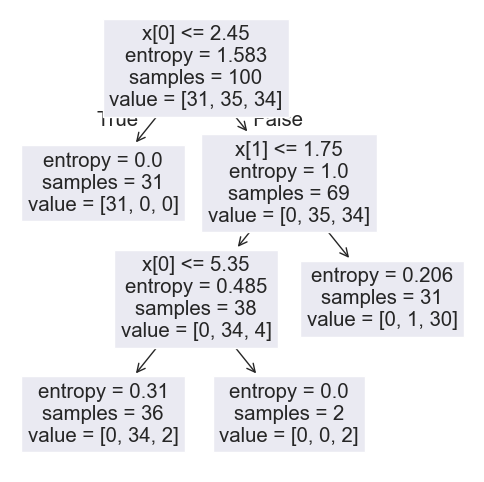

In [92]:
# рассмотрим пример классификации с помощью решающего дерева

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris.data[:,[2,3]], columns = ['petal_l', 'petal_w'])
df['target'] = iris.target

X = df[['petal_l', 'petal_w']]
y = df.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 1/3,
                                                    random_state = 42)


clf = DecisionTreeClassifier(criterion = 'entropy',
                             max_leaf_nodes = 4,
                             random_state = 42)

clf.fit(X_train, y_train)

plt.figure(figsize = (6,6))
tree.plot_tree(clf)
plt.show()

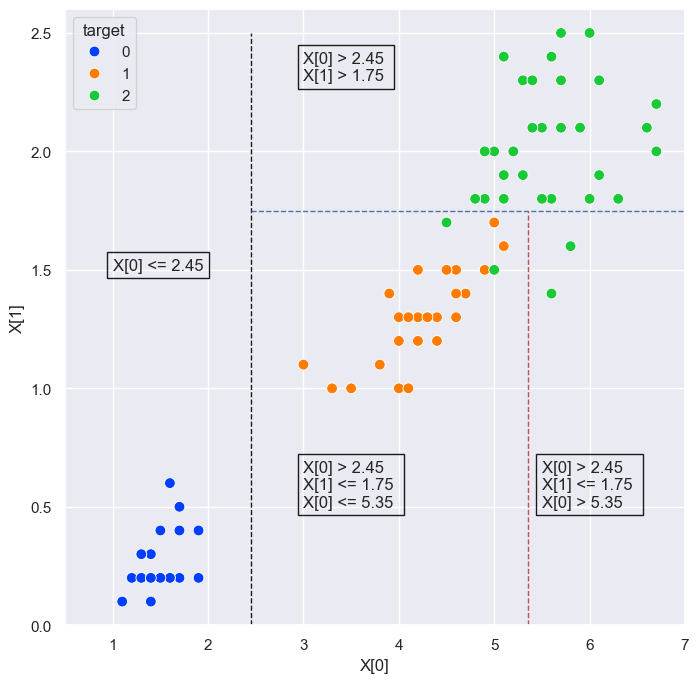

In [93]:
plt.figure(figsize = (8,8))
ax = plt.axes()

sns.scatterplot(x = X_train.petal_l, y = X_train.petal_w,
                hue = df.target,
                palette = 'bright',
                s = 60)

ax.vlines(x = 2.45, ymin = 0, ymax = 2.5, linewidth = 1, color = 'k', linestyles = '--')
ax.text(1, 1.5, 'X[0] <= 2.45', fontsize = 12, bbox = dict(facecolor = 'none', edgecolor = 'k'))

ax.hlines(y = 1.75, xmin = 2.45, xmax = 7, linewidth = 1, color = 'b', linestyles = '--')
ax.text(3, 2.3, 'X[0] > 2.45 \nX[1] > 1.75', fontsize = 12, bbox = dict(facecolor = 'none', edgecolor = 'k'))

ax.vlines(x = 5.35, ymin = 0, ymax = 1.75, linewidth = 1, color = 'r', linestyles = '--')
ax.text(3, 0.5, 'X[0] > 2.45 \nX[1] <= 1.75 \nX[0] <= 5.35', fontsize = 12, bbox = dict(facecolor = 'none', edgecolor = 'k'))
ax.text(5.5, 0.5, 'X[0] > 2.45 \nX[1] <= 1.75 \nX[0] > 5.35', fontsize = 12, bbox = dict(facecolor = 'none', edgecolor = 'k'))

plt.xlim([0.5, 7])
plt.ylim([0, 2.6])

plt.xlabel('X[0]')
plt.ylabel('X[1]')

plt.show()

#### iForest в sklearn

##### Пример из sklearn

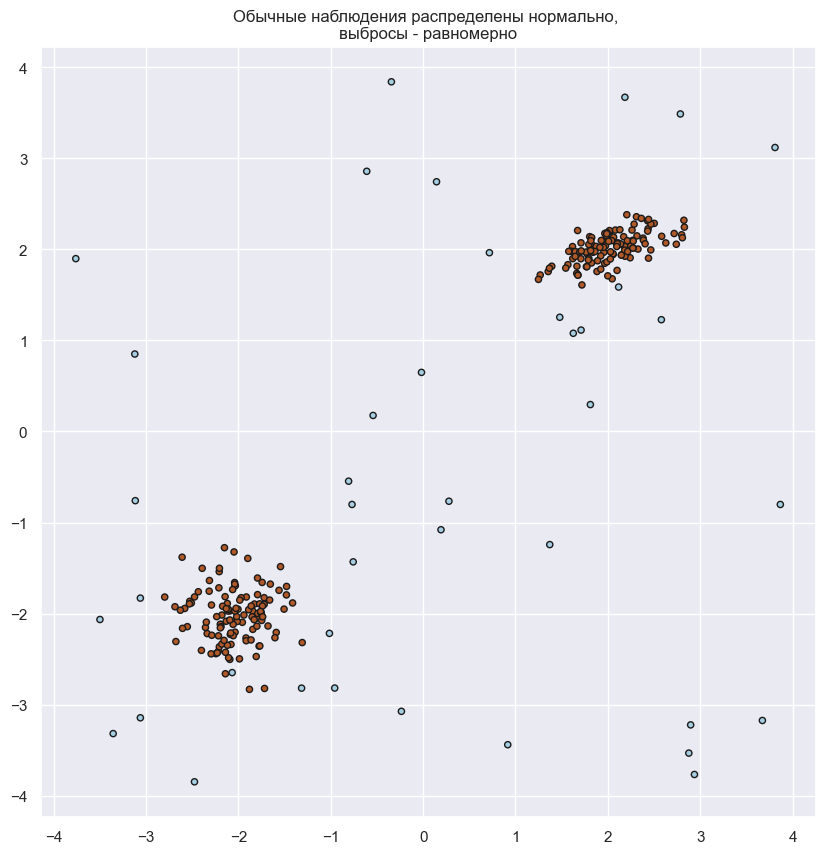

In [94]:
from sklearn.model_selection import train_test_split

# зададим количество обычных наблюдений и выбросов
n_samples, n_outliers = 120, 40
rng = np.random.RandomState(0)


# создадим вытянутое (за счет умножения на covariance)
covariance = np.array([[0.5, -0.1], [0.7, 0.4]])
# и сдвинутое вверх вправо
shift = np.array([2, 2])
# облако объектов
cluster_1 = 0.4 * rng.randn(n_samples, 2) @ covariance + shift

# создадим сферическое и сдвинутое вниз влево облако объектов
cluster_2 = 0.3 * rng.randn(n_samples, 2) + np.array([-2, -2])

# создадим выбросы
outliers = rng.uniform(low = -4, high = 4, size = (n_outliers, 2))

# создадим пространство из двух признаков
X = np.concatenate([cluster_1, cluster_2, outliers])

# а также целевую переменную (1 для обычных наблюдений, -1 для выбросов)
y = np.concatenate(
    [np.ones((2 * n_samples), dtype = int),
     -np.ones((n_outliers), dtype=int)]
     )

scatter = plt.scatter(X[:, 0], X[:, 1],
                      c = y,
                      cmap = 'Paired',
                      s = 20,
                      edgecolor = 'k')

plt.title('Обычные наблюдения распределены нормально, \nвыбросы - равномерно')

plt.show()

In [95]:
# разделим выборку
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    random_state = 42)

# параметр stratify сделает так, что и в тестовой, и в обучающей выборке
# будет одинаковая доля выбросов
_, y_train_counts = np.unique(y_train, return_counts = True)
_, y_test_counts = np.unique(y_test, return_counts = True)

np.round(y_train_counts/len(y_train), 2), np.round(y_test_counts/len(y_test), 2)

(array([0.14, 0.86]), array([0.14, 0.86]))

In [96]:
from sklearn.ensemble import IsolationForest

# обучим алгоритм
isof = IsolationForest(max_samples = len(X_train), random_state = 0)
isof.fit(X_train)

IsolationForest(max_samples=210, random_state=0)

In [97]:
# сделаем прогноз на тесте и посмотрим результат
y_pred = isof.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9428571428571428

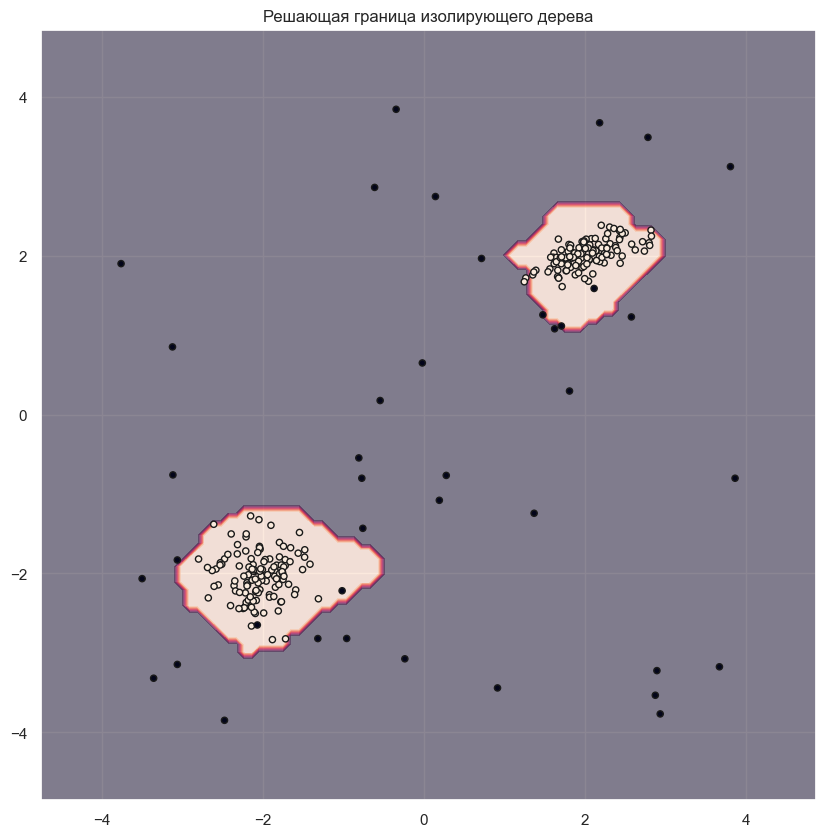

In [98]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    isof,
    X,
    response_method = 'predict',
    alpha = 0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
disp.ax_.set_title('Решающая граница изолирующего дерева')
plt.show()

##### Настройка гиперпараметров

In [99]:
X_ = [[-1], [2], [3], [5], [7], [10], [12], [20], [30], [100]]

In [100]:
clf = IsolationForest(contamination = 'auto', random_state = 42).fit(X_)
print(clf.predict(X_))
print(clf.decision_function(X_))

[-1  1  1  1  1  1  1  1 -1 -1]
[-0.00403873  0.10617494  0.11864618  0.11188085  0.11479849  0.09281731
  0.0780247   0.00948311 -0.08497048 -0.27336568]


In [101]:
clf = IsolationForest(contamination = 0.1, random_state = 42).fit(X_)
print(clf.predict(X_))
print(clf.decision_function(X_))

[ 1  1  1  1  1  1  1  1  1 -1]
[ 0.09977127  0.20998494  0.22245618  0.21569085  0.21860849  0.19662731
  0.1818347   0.11329311  0.01883952 -0.16955568]


In [102]:
clf = IsolationForest(contamination = 0.2, random_state = 42).fit(X_)
print(clf.predict(X_))
print(clf.decision_function(X_))

[ 1  1  1  1  1  1  1  1 -1 -1]
[ 0.01618635  0.12640002  0.13887126  0.13210593  0.13502358  0.11304239
  0.09824979  0.02970819 -0.0647454  -0.25314059]


##### Датасет boston

In [103]:
X_boston = boston.drop(columns = 'MEDV')
y_boston = boston.MEDV

clf = IsolationForest(max_samples = 100, random_state = 0)
clf.fit(X_boston)

# создадим столбец с anomaly_score
boston['scores'] = clf.decision_function(X_boston)
# и результатом (выброс (-1) или нет (1))
boston['anomaly'] = clf.predict(X_boston)

# посмотрим на количество выбросов
boston[boston.anomaly == -1].shape[0]

106

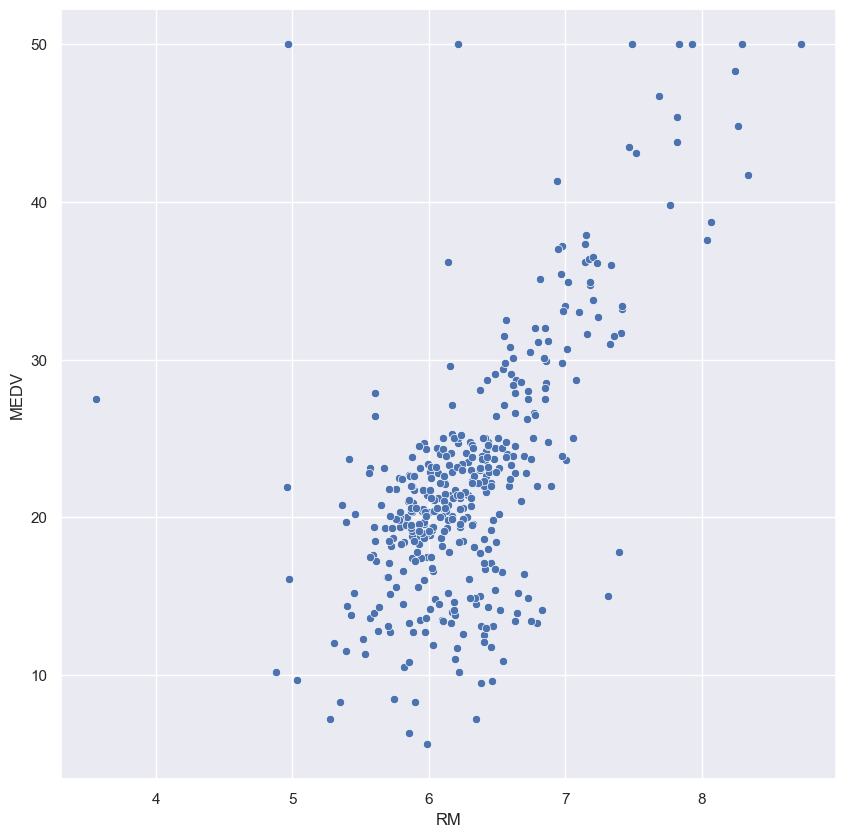

In [104]:
boston_ifor = boston[boston.anomaly == 1]
sns.scatterplot(x = boston_ifor.RM, y = boston_ifor.MEDV);

In [105]:
boston_ifor[['RM', 'MEDV']].corr()

,RM,MEDV
RM,1.0000,0.6612
MEDV,0.6612,1.0000


##### Недостаток алгоритма

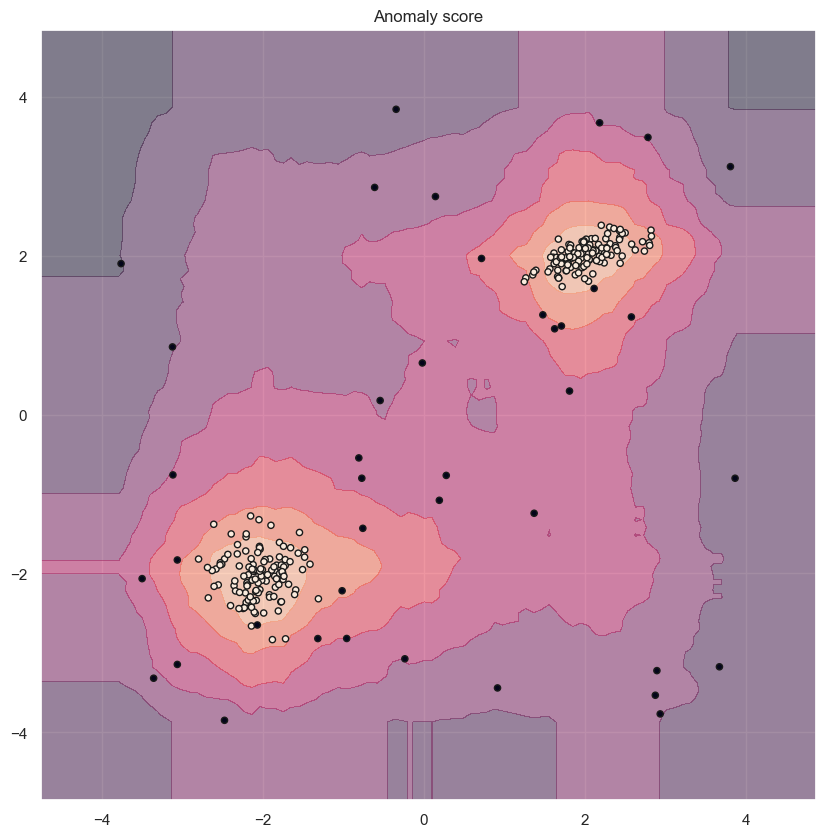

In [106]:
disp = DecisionBoundaryDisplay.from_estimator(
    isof,
    X,
    response_method = 'decision_function',
    alpha = 0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title('Anomaly score')
plt.show()

### Extended Isolation Forest

#### Установка h2o

In [107]:
!pip install h2o

   ---------------------------------------- 0.0/265.9 MB ? eta -:--:--
    --------------------------------------- 5.5/265.9 MB 33.4 MB/s eta 0:00:08
   --- ------------------------------------ 21.0/265.9 MB 55.2 MB/s eta 0:00:05
   ----- ---------------------------------- 37.5/265.9 MB 62.7 MB/s eta 0:00:04
   ------- -------------------------------- 52.7/265.9 MB 64.5 MB/s eta 0:00:04
   ---------- ----------------------------- 66.8/265.9 MB 64.5 MB/s eta 0:00:04
   ------------ --------------------------- 80.7/265.9 MB 65.2 MB/s eta 0:00:03
   -------------- ------------------------- 95.4/265.9 MB 65.4 MB/s eta 0:00:03
   ---------------- ---------------------- 109.6/265.9 MB 65.4 MB/s eta 0:00:03
   ----------------- --------------------- 122.2/265.9 MB 65.0 MB/s eta 0:00:03
   ------------------- ------------------- 135.5/265.9 MB 64.1 MB/s eta 0:00:03
   --------------------- ----------------- 149.7/265.9 MB 64.6 MB/s eta 0:00:02
   ----------------------- --------------- 163.3/2

In [113]:
# ! apt-get install default-jre
!java -version

'java' is not recognized as an internal or external command,
operable program or batch file.


#### Запуск h2o сервера

In [111]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.0.1+9-30, mixed mode, sharing)
  Starting server from C:\Users\Maryia_Krauchanka\AppData\Local\miniconda3\envs\myenv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\MARYIA~1\AppData\Local\Temp\tmpewd32cij
  JVM stdout: C:\Users\MARYIA~1\AppData\Local\Temp\tmpewd32cij\h2o_MaryiaKrauchanka_started_from_python.out
  JVM stderr: C:\Users\MARYIA~1\AppData\Local\Temp\tmpewd32cij\h2o_MaryiaKrauchanka_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Vilnius
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 1 day
H2O_cluster_name:,H2O_from_python_MaryiaKrauchanka_ntbt46
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.862 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


#### Обучение алгоритмов

In [115]:
# импортируем класс Extended Isolation Forest
from h2o.estimators import H2OExtendedIsolationForestEstimator

# зададим основные параметры алгоритмов
ntrees = 400
sample_size = len(X)
seed = 42

# создадим специальный h2o датафрейм
training_frame = h2o.H2OFrame(X)

# создадим класс обычного изолирующего леса
IF_h2o = H2OExtendedIsolationForestEstimator(
                                              model_id = 'isolation_forest',
                                              ntrees = ntrees,
                                              sample_size = sample_size,
                                              extension_level = 0,
                                              seed = seed
                                             )

# обучим модель
IF_h2o.train(training_frame = training_frame)

# создадим класс расширенного изолирующего леса
EIF_h2o = H2OExtendedIsolationForestEstimator(
                                              model_id = 'extended_isolation_forest',
                                              ntrees = ntrees,
                                              sample_size = sample_size,
                                              extension_level = 1,
                                              seed = seed
                                             )

# обучим модель
EIF_h2o.train(training_frame = training_frame)

# выведем статистику по каждой из моделей
print(IF_h2o)
print(EIF_h2o)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
Model Details
H2OExtendedIsolationForestEstimator : Extended Isolation Forest
Model Key: isolation_forest


Model Summary: 
    number_of_trees    size_of_subsample    extension_level    seed    number_of_trained_trees    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves    min_isolated_point    max_isolated_point    mean_isolated_point    min_not_isolated_point    max_not_isolated_point    mean_not_isolated_point    min_zero_splits    max_zero_splits    mean_zero_splits
--  -----------------  -------------------  -----------------  ------  -------------------------  -----------  -----------  ------------  ------------  ------------  -------------  --------------------  ------

#### Сравнение алгоритмов

##### Обычный алгоритм

In [116]:
# рассчитаем anomaly_score для обычного алгоритма
h2o_anomaly_score_if = IF_h2o.predict(training_frame)

# преобразуем результат в датафрейм
h2o_anomaly_score_if_df = h2o_anomaly_score_if.as_data_frame(use_pandas = True,
                                                             header = True,
                                                             use_multi_thread = True)

extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%


c:\Users\Maryia_Krauchanka\AppData\Local\miniconda3\envs\myenv\lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [117]:
# посмотрим на результат
h2o_anomaly_score_if_df.head()

,anomaly_score,mean_length
0,0.414619,13.239968
1,0.503174,10.328823
2,0.405333,13.580600
3,0.381291,14.500156
4,0.376005,14.710097


In [118]:
data = pd.DataFrame(X, columns = ['x1', 'x2'])
data['target'] = y

In [119]:
# выберем количество наблюдений
sample = 60

# для наглядности рассчитаем долю от общего числа наблюдений
sample / len(X)

0.21428571428571427

In [120]:
if_df = pd.concat([data, h2o_anomaly_score_if_df], axis = 1)
if_df.sort_values(by = 'anomaly_score', ascending = False, inplace = True)
np.unique(if_df.iloc[:sample, 2], return_counts = True)

(array([-1,  1]), array([39, 21], dtype=int64))

##### Расширенный алгоритм

In [121]:
h2o_anomaly_score_eif = EIF_h2o.predict(training_frame)
h2o_anomaly_score_eif_df = h2o_anomaly_score_eif.as_data_frame(use_pandas = True,
                                                               header = True,
                                                               use_multi_thread = True)

eif_df = pd.concat([data, h2o_anomaly_score_eif_df], axis = 1)
eif_df.sort_values(by = 'anomaly_score', ascending = False, inplace = True)
np.unique(eif_df.iloc[:sample, 2], return_counts = True)

extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%


c:\Users\Maryia_Krauchanka\AppData\Local\miniconda3\envs\myenv\lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


(array([-1,  1]), array([38, 22], dtype=int64))

#### Визуализация

In [122]:
granularity = 50

# сформируем данные для прогноза
xx, yy = np.meshgrid(np.linspace(-5, 5, granularity), np.linspace(-5, 5, granularity))
hf_heatmap = h2o.H2OFrame(np.c_[xx.ravel(), yy.ravel()])

# сделаем прогноз с помощью двух алгоритмов
h2o_anomaly_score_if = IF_h2o.predict(hf_heatmap)
h2o_anomaly_score_df_if = h2o_anomaly_score_if.as_data_frame(use_pandas = True,
                                                             header = True,
                                                             use_multi_thread = True)

heatmap_h2o_if = np.array(h2o_anomaly_score_df_if['anomaly_score']).reshape(xx.shape)

h2o_anomaly_score_eif = EIF_h2o.predict(hf_heatmap)
h2o_anomaly_score_df_eif = h2o_anomaly_score_eif.as_data_frame(use_pandas = True,
                                                               header = True,
                                                               use_multi_thread = True)

heatmap_h2o_eif = np.array(h2o_anomaly_score_df_eif['anomaly_score']).reshape(xx.shape)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |

c:\Users\Maryia_Krauchanka\AppData\Local\miniconda3\envs\myenv\lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████| (done) 100%


c:\Users\Maryia_Krauchanka\AppData\Local\miniconda3\envs\myenv\lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


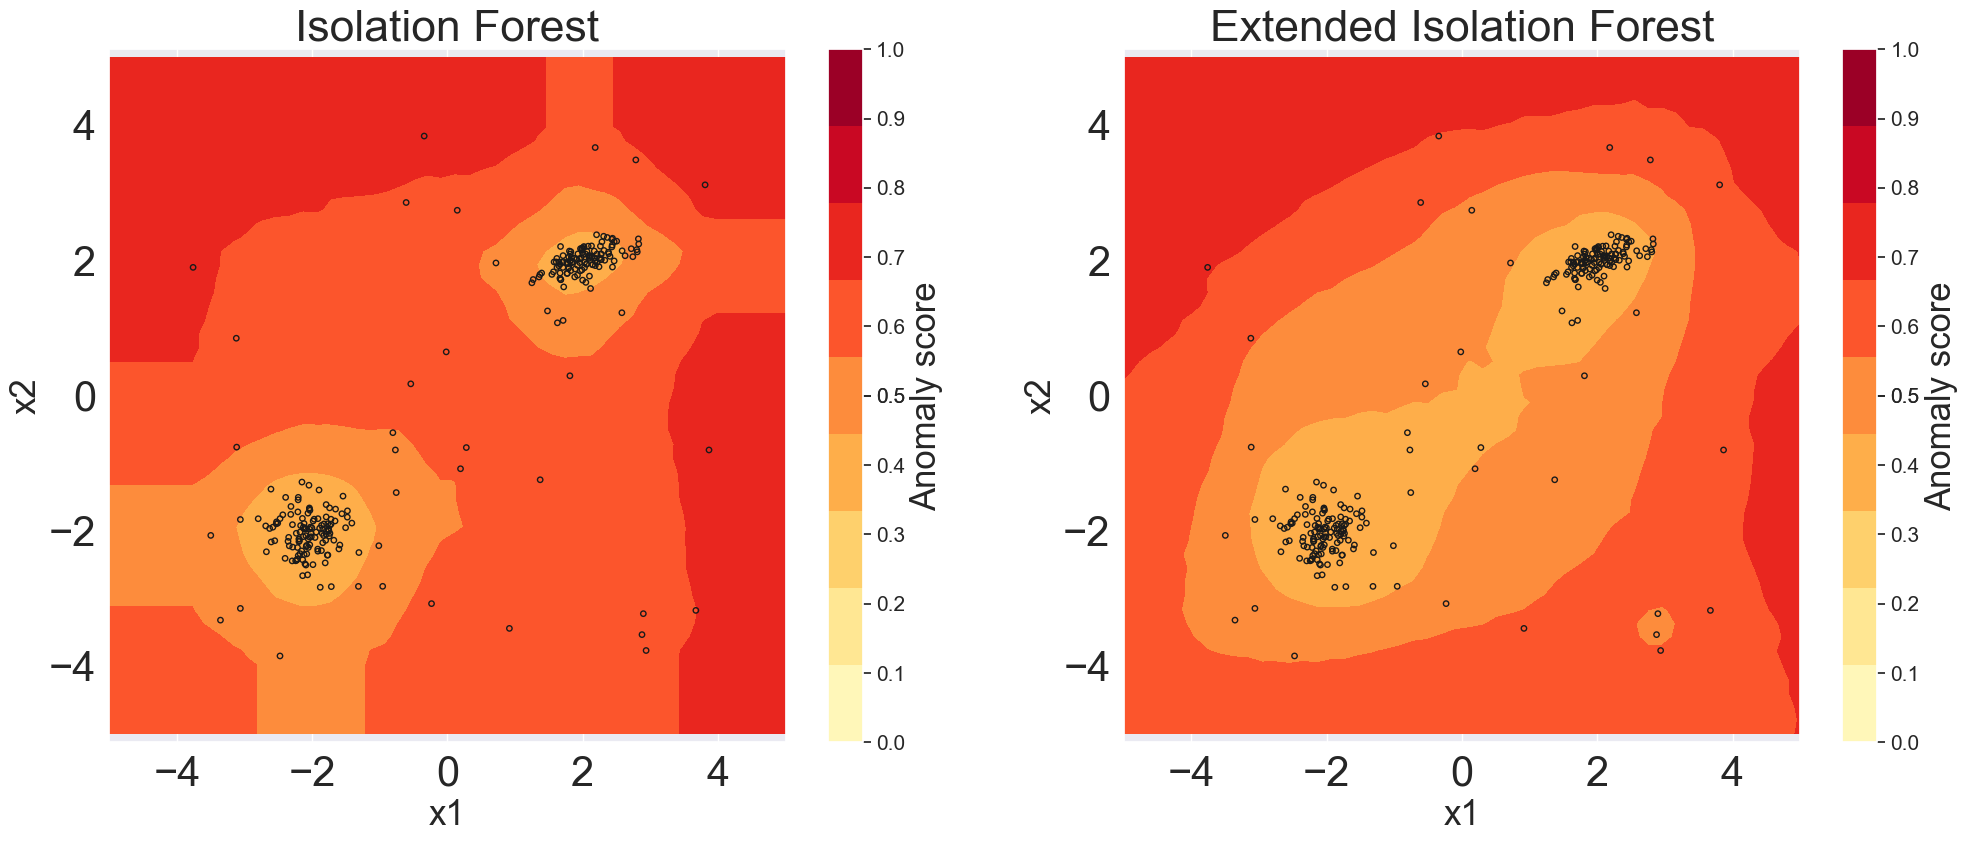

In [ ]:
f = plt.figure(figsize=(24, 9))

# объявим функцию для вывода подграфиков
def plot_heatmap(heatmap_data, subplot, title):
    """Plot heatmap."""
    ax1 = f.add_subplot(subplot)
    levels = np.linspace(0,1,10, endpoint = True)
    v = np.linspace(0, 1, 12, endpoint = True)
    v = np.around(v, decimals = 1)
    CS = ax1.contourf(xx, yy, heatmap_data, levels, cmap = plt.cm.YlOrRd)
    cbar = plt.colorbar(CS, ticks = v)
    cbar.ax.set_ylabel('Anomaly score', fontsize = 25)
    cbar.ax.tick_params(labelsize = 15)
    ax1.set_xlabel('x1', fontsize = 25)
    ax1.set_ylabel('x2', fontsize = 25)
    plt.tick_params(labelsize=30)
    plt.scatter(X[:,0],X[:,1],s=15,c='None',edgecolor='k')
    plt.axis('equal')
    plt.title(title,  fontsize=32)

# выведем тепловые карты
plot_heatmap(heatmap_h2o_if, 121, 'Isolation Forest')
plot_heatmap(heatmap_h2o_eif, 122, 'Extended Isolation Forest')

plt.show()